In [4]:
import os
import sys
sys.path.insert(0, os.path.abspath('..'))

In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import helium

plotdir = 'plots/'
datadir='data/'

sigmas=pd.read_csv(datadir+'sigmas.csv.gz',index_col=0,parse_dates=[0]).iloc[:,:-1]
returns=pd.read_csv(datadir+'returns.csv.gz',index_col=0,parse_dates=[0])
volumes=pd.read_csv(datadir+'volumes.csv.gz',index_col=0,parse_dates=[0]).iloc[:,:-1]

#, 'NKE', 'IBM', 'BAC', 'C'
subset_tickers  = list(volumes.ix[:, (volumes > 0).all()].columns)[:30] + ["USDOLLAR"]
sigmas = sigmas.ix[:, sigmas.columns.isin(subset_tickers)]
returns = returns.ix[:, returns.columns.isin(subset_tickers)]
volumes = volumes.ix[:, volumes.columns.isin(subset_tickers)]

start_date="2014-01-01"
end_date="2016-12-31"

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [6]:
cash_ticker = "_CASH"

In [7]:
sigmas[cash_ticker] = 0.
returns = returns.rename(columns={"USDOLLAR": cash_ticker})
volumes[cash_ticker] = np.finfo(np.float).max

In [8]:
w_b = pd.Series(index=returns.columns, data=1)
w_b._CASH = 0.
w_b/=sum(w_b)


In [6]:
return_estimate=pd.read_csv(datadir+'return_estimate.csv.gz',index_col=0,parse_dates=[0]).dropna()
volume_estimate=pd.read_csv(datadir+'volume_estimate.csv.gz',index_col=0,parse_dates=[0]).iloc[:,:-1].dropna()
sigma_estimate=pd.read_csv(datadir+'sigma_estimate.csv.gz',index_col=0,parse_dates=[0]).iloc[:,:-1].dropna()

return_estimate = return_estimate.ix[:, return_estimate.columns.isin(subset_tickers)]
volume_estimate = volume_estimate.ix[:, volume_estimate.columns.isin(subset_tickers)]
sigma_estimate = sigma_estimate.ix[:, sigma_estimate.columns.isin(subset_tickers)]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [7]:
sigma_estimate[cash_ticker] = 0.
return_estimate = return_estimate.rename(columns={"USDOLLAR": cash_ticker})
volume_estimate[cash_ticker] = np.finfo(np.float).max

In [8]:
borrow_costs = returns.copy()
borrow_costs[:] = 1E-4
borrow_costs[cash_ticker] = 0.

dividends = returns.copy()
dividends[:] = 0.

simulated_hcost=helium.HoldingCost(gamma = 1., borrow_costs=borrow_costs, dividends=dividends)
simulated_tcost=helium.TransactionCost(gamma =1.0, 
                                             half_spread=0.0005/2,
                                             nonlin_coef = 1.,
                                             sigmas = sigmas, 
                                             nonlin_power = 1.5,
                                             volumes = volumes,
                                             asym_coef = 0.)

simulator = helium.MarketSimulator(returns, volumes, costs=[
    simulated_tcost, 
    simulated_hcost
], cash_ticker=cash_ticker)

In [9]:
r_est_dict = {}
d_est_dict = {}
for day, series in return_estimate.iterrows():
    r_est_dict[day] = return_estimate.loc[[day]].copy()
    deltas = return_estimate.loc[[day]].copy()
    deltas[:] = 0.
    d_est_dict[day] = deltas

In [10]:
r= helium.DefaultReturns(r_est_dict,  d_est_dict , gamma_decay=None)

#Sigma_hat = returns.rolling(window=250, min_periods=250).cov().unstack().shift(1).stack().dropna()

In [14]:
w_b

MMM      0.033333
ABT      0.033333
ACN      0.033333
ATVI     0.033333
ADBE     0.033333
AAP      0.033333
AES      0.033333
AET      0.033333
AFL      0.033333
AMG      0.033333
A        0.033333
APD      0.033333
AKAM     0.033333
AGN      0.033333
ALXN     0.033333
ADS      0.033333
ALL      0.033333
GOOGL    0.033333
MO       0.033333
AMZN     0.033333
AEE      0.033333
AAL      0.033333
AEP      0.033333
AXP      0.033333
AMT      0.033333
AMP      0.033333
ABC      0.033333
AME      0.033333
AMGN     0.033333
APH      0.033333
_CASH    0.000000
dtype: float64

In [14]:
#factor_model = helium.FactorRiskCost(1.0, returns, window_size=256, n_factors=3)

In [15]:
Sigma_hat = returns.rolling(window=250, min_periods=250).cov().unstack().shift(1).stack().dropna()

In [28]:
#risk_model = helium.FactorRiskCost(1.0, returns, window_size=120, n_factors=3)

In [17]:
policies = {}
results = {}
gamma_risks_coarse=[.1,.3,1,3,10,30,100,300,1000]
gamma_tcosts_coarse=[1,2,5,10,20]
for gamma_risk in gamma_risks_coarse:
    for gamma_tcost in gamma_tcosts_coarse: 
        #risk_model = helium.FactorRiskCost(1.0, returns, window_size=120, n_factors=3)
        risk_model = helium.BasicRiskCost(gamma_risk, Sigma_hat)
        optimization_hcost = helium.HoldingCost(gamma = 1., borrow_costs=borrow_costs, dividends=dividends)
        optimization_tcost = helium.TransactionCost(gamma_tcost, 
                                                    half_spread=0.0005/2., 
                                                    nonlin_coef = 1.,
                                                    sigmas = sigma_estimate, 
                                                    nonlin_power = 1.5,
                                                    volumes = volume_estimate,
                                                    asym_coef = 0.)
        
        # issue optimization_tcost
        costs = [ risk_model, 
                 optimization_tcost, 
                 optimization_hcost
                ]
        const = [helium.LeverageLimitConstraint(3)]
        policies[(gamma_risk, gamma_tcost)] = helium.SinglePeriodOpt(r, costs, const)
        

In [19]:
results.update(dict(zip(policies.keys(), simulator.run_multi(1E8*w_b, policies.values(), start_date, end_date, parallel=False ) ) ) )

In [ ]:
#results.update(dict(zip(policies.keys(), simulator.run_multi(1E8*w_b, policies.values(), start_date + pd.Timedelta("500 days"), end_date, parallel=True ) ) ) )

In [20]:
result_df_coarse=pd.DataFrame()
for k in results:
    if k[0] in gamma_risks_coarse and k[1] in gamma_tcosts_coarse:
        result_df_coarse.loc[k[0], k[1]] = results[k]
        
result_df = result_df_coarse.loc[sorted(result_df_coarse.index), sorted(result_df_coarse.columns)]

[35.130031984737975, 34.786101594677774, 33.785476278689785, 31.372473956437382, 25.830483838991938, 17.548818841943969, 10.273842730325272, 5.2530124843893367, 1.8081974712396214] [-50.42774784250343, -51.021572158628025, -52.79941107805063, -54.34648688698087, -51.91238211527575, -48.33965415205934, -40.34215155943854, -21.176340591319452, -5.687913294690043]
[22.223233085008683, 21.884085237188248, 20.918862112131848, 19.141386705629031, 15.579413693670263, 11.294559287158039, 7.1553873957123848, 3.4589426445208411, 1.3561794916364172] [5.391207144645169, 5.542096122292193, 6.361344237695476, 7.624453661802367, 7.183911289304016, -0.22474593682067312, -4.968451836677073, -2.8868589416320827, -0.9534441132547599]
[22.699179762007287, 21.429335136828154, 17.521446370003005, 12.61911146469242, 9.2689503960149047, 6.307288514236145, 3.2222893749005745, 1.6714033673607225, 0.76902116846319968] [22.81944848608392, 22.662495331412217, 19.874457214916735, 14.008557224039421, 7.9517805370489

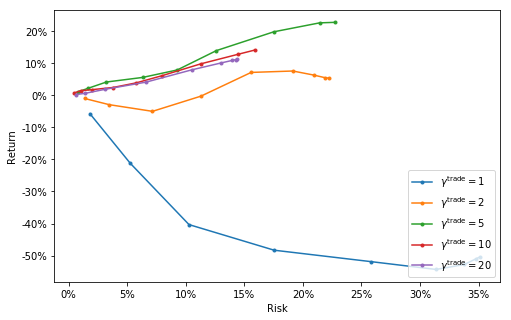

In [32]:
plt.figure(figsize=(8,5))
for gamma_tcost in result_df.columns:
    x=[el.excess_returns.std()*100*np.sqrt(250) for el in result_df[gamma_tcost]]
    y=[el.excess_returns.mean()*100*250 for el in result_df[gamma_tcost]]
    print(x,y)
    plt.plot(np.array(x),np.array(y), '.-', label='$\gamma^\mathrm{trade} = %g$'%gamma_tcost)
plt.legend(loc='lower right')
plt.xlabel('Risk')
plt.ylabel('Return')


import matplotlib.ticker as mtick
ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))

plt.savefig(plotdir+'spo_riskrewardfrontier.png')

### Fine Search

In [22]:
policies = {}
gamma_risks_fine=gamma_risks_coarse
gamma_tcosts_fine=[4,5,6,7,8]
for gamma_risk in gamma_risks_fine:
    for gamma_tcost in gamma_tcosts_fine: 
        risk_model = helium.BasicRiskCost(gamma_risk, Sigma_hat)
        optimization_hcost = helium.HoldingCost(gamma = 1., borrow_costs=borrow_costs, dividends=dividends)
        optimization_tcost = helium.TransactionCost(gamma_tcost, 
                                                    half_spread=0.0005/2., 
                                                    nonlin_coef = 1.,
                                                    sigmas = sigma_estimate, 
                                                    nonlin_power = 1.5,
                                                    volumes = volume_estimate,
                                                    asym_coef = 0.)
        
        # issue optimization_tcost
        costs = [
            risk_model, 
                 optimization_tcost, 
                 optimization_hcost
                ]
        const = [helium.LeverageLimitConstraint(3)]
        policies[(gamma_risk, gamma_tcost)] = helium.SinglePeriodOpt(r, costs, const)

In [23]:
results.update(dict(zip(policies.keys(), simulator.run_multi(1E8*w_b, policies.values(), start_date, end_date, parallel=False ) ) ) )

In [24]:
result_df_fine=pd.DataFrame()
for k in results:
    if k[0] in gamma_risks_fine and k[1] in list(gamma_tcosts_fine):
        result_df_fine.loc[k[0], k[1]] = results[k]
        
result_df_fine=result_df_fine.loc[sorted(result_df_fine.index),sorted(result_df_fine.columns)]

[20.792003021384168, 19.918454221862412, 17.873151221050438, 14.452051076059179, 10.427360689837808, 7.2495585791191548, 3.9366906259487715, 2.0377270707927346, 0.90192859497036193] [26.425380408121047, 26.107288209439993, 24.548153289946523, 19.008066609862517, 10.945834579691965, 7.695941785992946, 4.258102790081476, 2.1676922473851774, 0.9554317402975988]
[22.699179762007287, 21.429335136828154, 17.521446370003005, 12.61911146469242, 9.2689503960149047, 6.307288514236145, 3.2222893749005745, 1.6714033673607225, 0.76902116846319968] [22.81944848608392, 22.662495331412217, 19.874457214916735, 14.008557224039421, 7.95178053704893, 5.615587763778306, 4.188193083648218, 2.250162044447296, 1.0744768920137362]
[24.372759455374126, 22.703920646615355, 16.979821270450017, 11.011619549318318, 8.2429156374455204, 5.4221415141699243, 2.768316243459072, 1.4280057107493409, 0.6676588739993885] [20.97113811411245, 20.459337649619936, 17.02740967447279, 10.890576809748868, 6.5886593754380325, 4.562

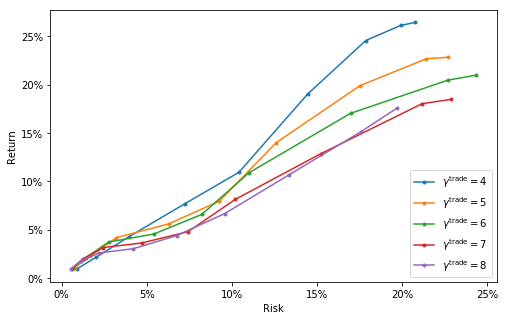

In [29]:
plt.figure(figsize=(8,5))
for gamma_tcost in result_df_fine.columns[:]:
    x=[el.excess_returns.std()*100*np.sqrt(250) for el in result_df_fine[gamma_tcost]]
    y=[el.excess_returns.mean()*100*250 for el in result_df_fine[gamma_tcost]]
    print(x,y)
    plt.plot(np.array(x),np.array(y), '.-', label='$\gamma^\mathrm{trade} = %g$'%gamma_tcost)
plt.legend(loc='lower right')
plt.xlabel('Risk')
plt.ylabel('Return')

import matplotlib.ticker as mtick
ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))

#plt.savefig(plotdir+'spo_riskrewardfrontier_fine.png')

### Pareto

In [33]:
results_pareto={}

In [34]:
policies = {}
#results = {}
gamma_risks_pareto=[0.1, 0.17782, 0.31624, 0.562, 1.0, 2, 3, 6, 10, 18, 32, 56, 100, 178, 316, 562, 1000]
gamma_tcosts_pareto=[5.5,6,6.5,7,7.5,8]
gamma_holdings=[.1,1.,10.,100., 1000.]
for gamma_risk in gamma_risks_pareto:
    for gamma_tcost in gamma_tcosts_pareto : 
        for gamma_holding in gamma_holdings:
            risk_model = helium.BasicRiskCost(gamma_risk, Sigma_hat)
            optimization_hcost = helium.HoldingCost(gamma_holding , borrow_costs=borrow_costs, dividends=dividends)
            optimization_tcost = helium.TransactionCost(gamma_tcost, 
                                                    half_spread=0.0005/2., 
                                                    nonlin_coef = 1.,
                                                    sigmas = sigma_estimate, 
                                                    nonlin_power = 1.5,
                                                    volumes = volume_estimate,
                                                    asym_coef = 0.)
        
            # issue optimization_tcost

            costs = [risk_model,    optimization_tcost,                  optimization_hcost  ]
            const = [helium.LeverageLimitConstraint(3)]
            policies[(gamma_risk, gamma_tcost, gamma_holding)] = helium.SinglePeriodOpt(r, costs, const)

In [35]:
results_pareto.update(dict(zip(policies.keys(), simulator.run_multi(1E8*w_b, policies.values(), start_date, end_date, parallel=False ) ) ) )

In [36]:
table=pd.DataFrame()
table[r'$\gamma^\mathrm{risk}$']=[el[0] for el in results_pareto.keys()]
table[r'$\gamma^\mathrm{trade}$']=[el[1] for el in results_pareto.keys()]
table[r'$\gamma^\mathrm{hold}$']=['%g'%el[2] for el in results_pareto.keys()]
table['Return']=[(results_pareto[k].excess_returns.mean()*100*250) for k in results_pareto.keys()]
table['Risk']=[(results_pareto[k].excess_returns.std()*100*np.sqrt(250)) for k in results_pareto.keys()]
table = table.sort_values('Risk', ascending=False).reset_index()
del table['index']
is_pareto = lambda i: table.loc[i,'Return']>=max(table.ix[i:].Return)
table['is_pareto'] = [is_pareto(i) for i in range(len(table))]
table.to_csv(datadir+'spo_pareto_results_big.csv', float_format='%g')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


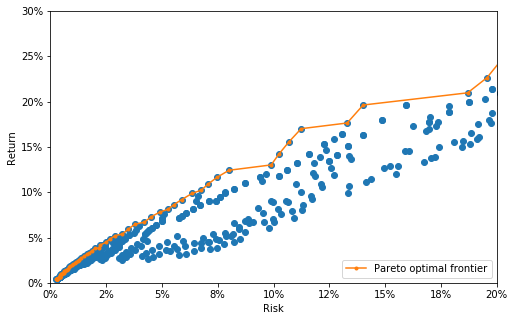

In [37]:
plt.figure(figsize=(8,5))
plt.scatter(table.Risk.values,table.Return.values)
plt.plot(table[table.is_pareto].Risk,table[table.is_pareto].Return, 'C1.-', label='Pareto optimal frontier')
plt.legend( loc='lower right')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.xlim([0,20])
plt.ylim([0,30])

import matplotlib.ticker as mtick
ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))

#plt.savefig(plotdir+'spo_pareto.png')

In [39]:
xlim=20
ylim=30
table=table[table.is_pareto]
table=table[table.Risk <= xlim]
table=table[table.Return <= ylim]
del table['is_pareto']
table.Risk=table.Risk.apply(lambda x: '%.2f%%'%x)
table.Return=table.Return.apply(lambda x: '%.2f%%'%x)
print(table.iloc[::-1].to_latex(float_format='%.2f', escape=False, index=False).replace('%',r'\%'))

\begin{tabular}{rrlll}
\toprule
 $\gamma^\mathrm{risk}$ &  $\gamma^\mathrm{trade}$ & $\gamma^\mathrm{hold}$ &  Return &    Risk \\
\midrule
                 1000.0 &                      8.0 &                   1000 &   0.37\% &   0.28\% \\
                 1000.0 &                      7.5 &                   1000 &   0.37\% &   0.28\% \\
                 1000.0 &                      7.5 &                    100 &   0.37\% &   0.28\% \\
                 1000.0 &                      7.0 &                   1000 &   0.38\% &   0.29\% \\
                 1000.0 &                      7.0 &                    100 &   0.38\% &   0.29\% \\
                 1000.0 &                      6.5 &                   1000 &   0.39\% &   0.29\% \\
                 1000.0 &                      6.5 &                    100 &   0.40\% &   0.30\% \\
                 1000.0 &                      6.0 &                   1000 &   0.40\% &   0.30\% \\
                 1000.0 &                      6.0 &

In [40]:
table

,$\gamma^\mathrm{risk}$,$\gamma^\mathrm{trade}$,$\gamma^\mathrm{hold}$,Return,Risk
112,1.0,6.0,10,22.64%,19.56%
121,1.0,6.5,10,20.97%,18.70%
154,2.0,5.5,10,19.62%,14.01%
161,2.0,6.0,10,17.64%,13.30%
186,3.0,5.5,10,17.01%,11.24%
193,3.0,6.0,10,15.53%,10.68%
201,3.0,6.5,10,14.19%,10.24%
206,3.0,7.0,10,13.01%,9.89%
232,6.0,5.5,10,12.42%,8.00%
242,6.0,6.0,10,11.65%,7.47%
